# Problématique

Le client est "Pinky" une entreprise de télécommunication, qui vend des forfaits téléphonique et internet. Ses clients sont donc abonnés, et paient mensuellement. Mais chaque mois, des clients résilient leur abonnement, c'est ce qu'on appelle le taux d'attrition (churn rate en anglais). C'est un indicateur très employé dans tous les secteurs avec des abonnements (télécom, énergie, banque, assurance, etc...).

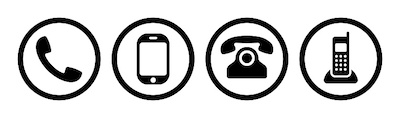
 

Pinky dispose d'une plateforme d'appel, avec des conseillers. Les conseillers peuvent appeler les clients pour leur faire des propositions commerciales. Pinky a remarqué qu'il est presqu'impossible de faire revenir un client qui a résilié. Il préfère donc faire des propositions commerciales aux clients "à risque", avant qu'ils ne résilient.

C'est pourquoi Pinky fait appel à toi ! Pinky te fournit une extraction d'un échantillon représentatif de sa base client, dont des clients qui ont résilié ce mois-ci. Ton but va être de décrire les caractéristiques des clients ayant résilié et ce qui les distingue des autres clients. Puis tu devras proposer un scoring pour chaque client, afin de prioriser les appels vers les clients les plus à risque.

# Challenge

Calcul le taux d'attrition (nombre de résiliations / nombre total de clients), puis effectue l'analyse demandée, avec des visualisations explicatives, et propose un scoring par client.

Tu trouveras l'échantillon de la base client ici.

Nous te laissons libre d'y répondre à ta manière. La créativité, l'intuition, la faculté de s'imaginer à la place du client, sont des compétences très importantes dans nos métiers.

# IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set()
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn import model_selection

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [ ]:
# Pour agrandir la page et l'affichage
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Afficher toutes les colonnes du dataframe
pd.set_option('display.max_columns', None)

In [ ]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/churn_telecom.csv"

df_telecom = pd.read_csv(link)
df_telecom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,No


## Signification des colonnes :

customerID: Customer ID

genderCustomer: gender (female, male)

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner : Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, 
Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

# Vérifs de base

In [ ]:
df_telecom.info() # Pas de valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- 7043 clients
- Colonne 'SeniorCitizen' = 0 pour 25% / 50% / 75%. Problème avec cette colonne ?
- Moyenne de charges mensuelles : 64,76 $

In [ ]:
df_telecom.shape

(7043, 21)

# Répartition des données (value_counts)

In [ ]:
df_telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### CustomerID

In [ ]:
df_telecom["customerID"].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Colonne inutile, à supprimer sans incidence sur la suite ?

In [ ]:
# df_telecom=df_telecom.drop("customerID", axis=1)
# df_telecom.head()

### Gender

In [ ]:
df_telecom["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
# Transformation des données : 0 = Femme / 1 = Homme

df_telecom["gender"] = df_telecom["gender"].apply(lambda x: 0 if x == "Female" else 1)

In [ ]:
df_telecom["gender"].dtypes

dtype('int64')

In [ ]:
df_telecom["gender"].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

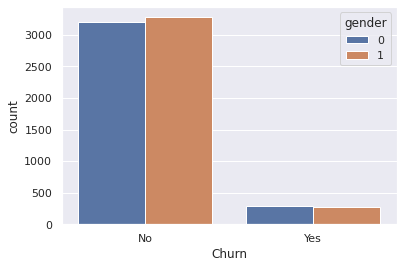

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["gender"])

### SeniorCitizen

In [ ]:
df_telecom["SeniorCitizen"].value_counts() # Remplissage de 0 et de 1 --> explique le problème de distribution visible dans le .describe

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

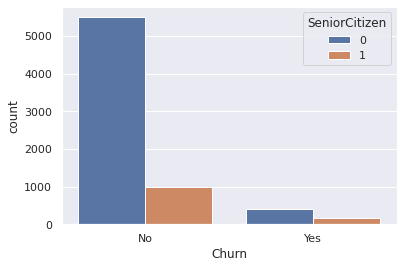

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["SeniorCitizen"])

### Partner

In [ ]:
df_telecom["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [ ]:
# Remplacement des Yes et No par 0 et 1 pour garder une cohérence avec les autres colonnes, qui utilisent ce système : (1 = Yes / 0 = No).

df_telecom['Partner'] = df_telecom['Partner'].map({'No':0, 'Yes':1})

In [ ]:
# Convertir cette colonne en float :

df_telecom['Partner'] = df_telecom['Partner'].astype('float64')

In [ ]:
df_telecom['Partner'].dtypes

dtype('float64')

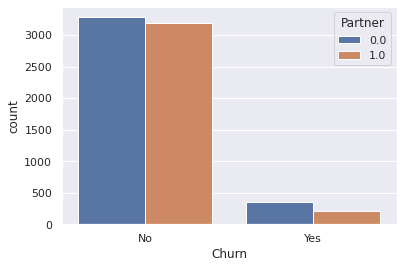

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["Partner"])

### Dependents

In [ ]:
df_telecom["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [ ]:
df_telecom['Dependents'] = df_telecom['Dependents'].map({'No':0, 'Yes':1})

In [ ]:
df_telecom['Dependents'] = df_telecom['Dependents'].astype('float64')

In [ ]:
df_telecom['Partner'].dtypes

dtype('float64')

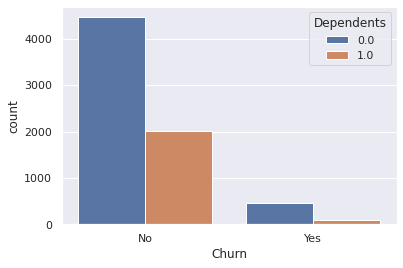

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["Dependents"])

### Tenure

In [ ]:
df_telecom["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [ ]:
df_telecom[df_telecom["tenure"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,1.0,1.0,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,1,0,0.0,1.0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,0,0,1.0,1.0,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,1,0,1.0,1.0,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,0,0,1.0,1.0,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,1,0,1.0,1.0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,1,0,1.0,1.0,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,0,0,1.0,1.0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,1,0,1.0,1.0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,0,0,1.0,1.0,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


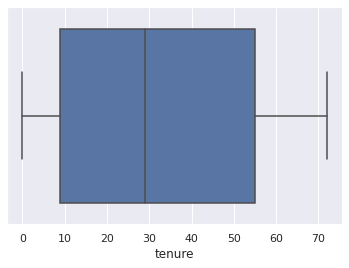

In [ ]:
sns.boxplot(df_telecom['tenure'])

Pas d'outliers.

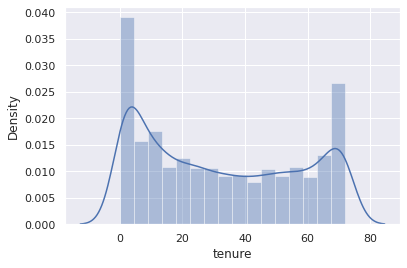

In [ ]:
sns.distplot(df_telecom['tenure'])

### PhoneService

In [ ]:
df_telecom["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [ ]:
df_telecom['PhoneService'] = df_telecom['PhoneService'].map({'No':0, 'Yes':1})

In [ ]:
df_telecom['PhoneService'] = df_telecom['PhoneService'].astype('float64')

In [ ]:
df_telecom['Partner'].dtypes

dtype('float64')

### MultipleLines

In [ ]:
df_telecom["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
df_telecom["MultipleLines"] = df_telecom["MultipleLines"].apply(lambda x: 0 if x == "No phone service" else 1 if x == "No" else 2)

In [ ]:
df_telecom["MultipleLines"].value_counts()

1    3390
2    2971
0     682
Name: MultipleLines, dtype: int64

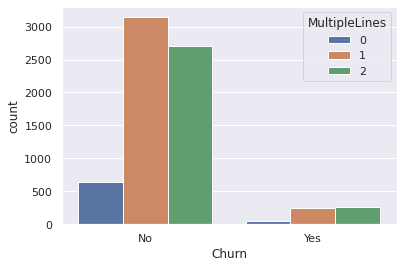

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["MultipleLines"])

### InternetService

In [ ]:
df_telecom["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
df_telecom["InternetService"] = df_telecom["InternetService"].apply(lambda x: 0 if x == "No" else 1 if x == "DSL" else 2)

In [ ]:
df_telecom["InternetService"].value_counts()

2    3096
1    2421
0    1526
Name: InternetService, dtype: int64

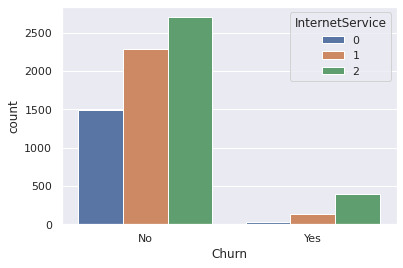

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["InternetService"])

### OnlineSecurity

In [ ]:
df_telecom["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
df_telecom["OnlineSecurity"] = df_telecom["OnlineSecurity"].apply(lambda x: 0 if x == "No internet service" else 1 if x == "No" else 2)

In [ ]:
df_telecom["OnlineSecurity"].value_counts()

1    3498
2    2019
0    1526
Name: OnlineSecurity, dtype: int64

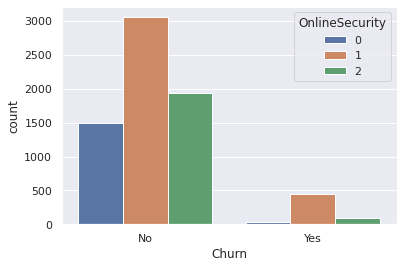

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["OnlineSecurity"])

### OnlineBackup

In [ ]:
df_telecom["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [ ]:
df_telecom["OnlineBackup"] = df_telecom["OnlineBackup"].apply(lambda x: 0 if x == "No internet service" else 1 if x == "No" else 2)

In [ ]:
df_telecom["OnlineBackup"].value_counts()

1    3088
2    2429
0    1526
Name: OnlineBackup, dtype: int64

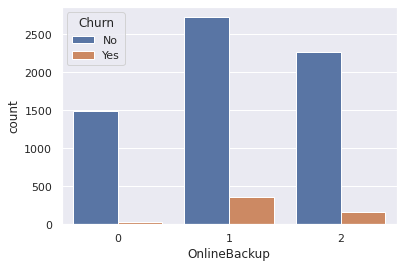

In [ ]:
sns.countplot(df_telecom['OnlineBackup'], hue = df_telecom["Churn"])

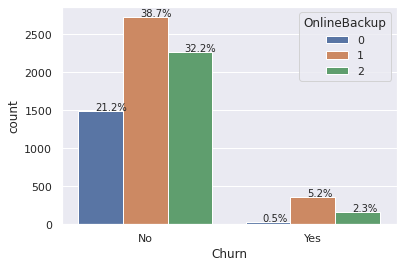

In [ ]:
ax = sns.countplot(df_telecom['Churn'],hue=df_telecom["OnlineBackup"])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df_telecom)), (p.get_x()+0.1, p.get_height()+5))

plt.show()

### DeviceProtection

In [ ]:
df_telecom["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [ ]:
df_telecom["DeviceProtection"] = df_telecom["DeviceProtection"].apply(lambda x: 0 if x == "No internet service" else 1 if x == "No" else 2)

In [ ]:
df_telecom["DeviceProtection"].value_counts()

1    3095
2    2422
0    1526
Name: DeviceProtection, dtype: int64

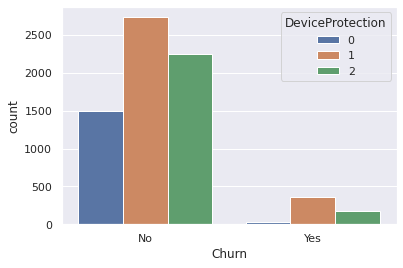

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["DeviceProtection"])

### TechSupport

In [ ]:
df_telecom["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [ ]:
df_telecom["TechSupport"] = df_telecom["TechSupport"].apply(lambda x: 0 if x == "No internet service" else 1 if x == "No" else 2)

In [ ]:
df_telecom["TechSupport"].value_counts()

1    3473
2    2044
0    1526
Name: TechSupport, dtype: int64

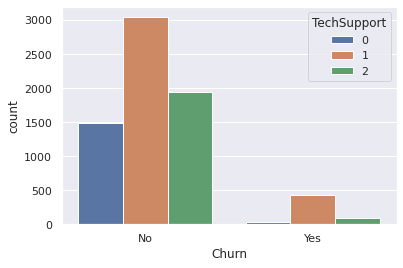

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["TechSupport"])

### StreamingTV

In [ ]:
df_telecom["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [ ]:
df_telecom["StreamingTV"] = df_telecom["StreamingTV"].apply(lambda x: 0 if x == "No internet service" else 1 if x == "No" else 2)

In [ ]:
df_telecom["StreamingTV"].value_counts()

1    2810
2    2707
0    1526
Name: StreamingTV, dtype: int64

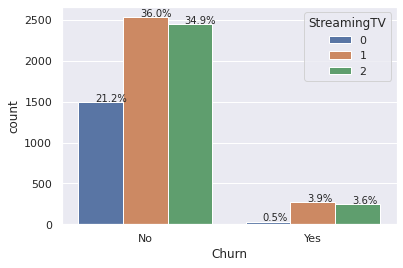

In [ ]:
ax = sns.countplot(df_telecom['Churn'],hue = df_telecom["StreamingTV"])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df_telecom)), (p.get_x()+0.1, p.get_height()+5))

plt.show()

### Contract

In [ ]:
df_telecom["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
df_telecom["Contract"] = df_telecom["Contract"].apply(lambda x: 0 if x == "Month-to-month" else 1 if x == "One year" else 2)

In [ ]:
df_telecom["Contract"].value_counts()

0    3875
2    1695
1    1473
Name: Contract, dtype: int64

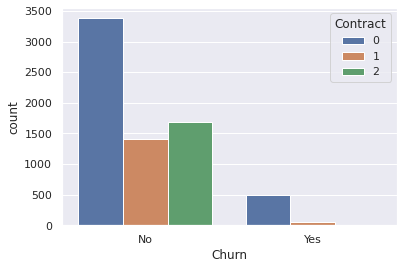

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["Contract"])

### StreamingMovies

In [ ]:
df_telecom["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [ ]:
df_telecom["StreamingMovies"] = df_telecom["StreamingMovies"].apply(lambda x: 0 if x == "No internet service" else 1 if x == "No" else 2)

In [ ]:
df_telecom["StreamingMovies"].value_counts()

1    2785
2    2732
0    1526
Name: StreamingMovies, dtype: int64

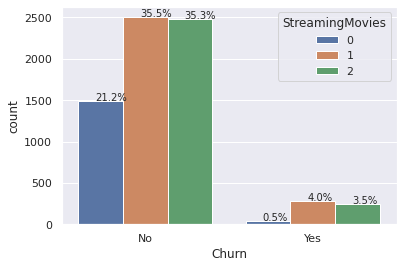

In [ ]:
ax = sns.countplot(df_telecom['Churn'],hue = df_telecom["StreamingMovies"])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df_telecom)), (p.get_x()+0.1, p.get_height()+5))

plt.show()

### PaperlessBilling

In [ ]:
df_telecom["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [ ]:
df_telecom["PaperlessBilling"] = df_telecom["PaperlessBilling"].apply(lambda x: 0 if x == "No" else 1)

In [ ]:
df_telecom["PaperlessBilling"].value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

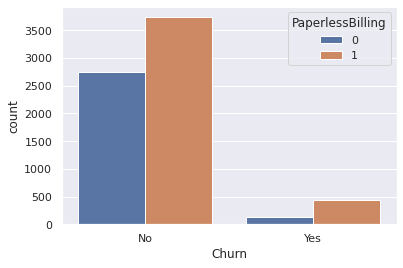

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["PaperlessBilling"])

### PaymentMethod

In [ ]:
df_telecom["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

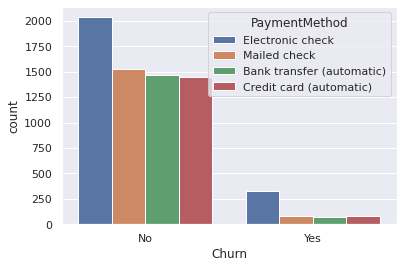

In [ ]:
sns.countplot(df_telecom['Churn'],hue=df_telecom["PaymentMethod"])

In [ ]:
df_telecom = pd.concat([df_telecom, df_telecom['PaymentMethod'].str.get_dummies()],axis = 1).drop(columns = ["PaymentMethod"])

### MonthlyCharges

In [ ]:
df_telecom["MonthlyCharges"].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [ ]:
df_telecom["MonthlyCharges"].dtypes # Données numériques

dtype('float64')

### TotalCharges

In [ ]:
df_telecom["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df_telecom["TotalCharges"].dtypes

dtype('O')

- Données numériques alors que la colonne est en type 'object'.
- 11 valeurs comprennent en fait des espaces comme on le voit ci-dessus. On va les remplacer par des NaN et convertir la colonne en float.
- Puis, on remplacera ces 11 NaN (qui sont devenues des valeurs manquantes) par la médiane.

In [ ]:
# Remplacer les espaces par des NaN :

df_telecom['TotalCharges'] = df_telecom['TotalCharges'].replace(' ', np.nan)

In [ ]:
df_telecom[df_telecom['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
488,4472-LVYGI,0,0,1.0,1.0,0,0.0,0,1,2,1,2,2,2,1,2,1,52.55,NaN,No,1,0,0,0
753,3115-CZMZD,1,0,0.0,1.0,0,1.0,1,0,0,0,0,0,0,0,2,0,20.25,NaN,No,0,0,0,1
936,5709-LVOEQ,0,0,1.0,1.0,0,1.0,1,1,2,2,2,1,2,2,2,0,80.85,NaN,No,0,0,0,1
1082,4367-NUYAO,1,0,1.0,1.0,0,1.0,2,0,0,0,0,0,0,0,2,0,25.75,NaN,No,0,0,0,1
1340,1371-DWPAZ,0,0,1.0,1.0,0,0.0,0,1,2,2,2,2,2,1,2,0,56.05,NaN,No,0,1,0,0
3331,7644-OMVMY,1,0,1.0,1.0,0,1.0,1,0,0,0,0,0,0,0,2,0,19.85,NaN,No,0,0,0,1
3826,3213-VVOLG,1,0,1.0,1.0,0,1.0,2,0,0,0,0,0,0,0,2,0,25.35,NaN,No,0,0,0,1
4380,2520-SGTTA,0,0,1.0,1.0,0,1.0,1,0,0,0,0,0,0,0,2,0,20.00,NaN,No,0,0,0,1
5218,2923-ARZLG,1,0,1.0,1.0,0,1.0,1,0,0,0,0,0,0,0,1,1,19.70,NaN,No,0,0,0,1
6670,4075-WKNIU,0,0,1.0,1.0,0,1.0,2,1,1,2,2,2,2,1,2,0,73.35,NaN,No,0,0,0,1


Ce sont les lignes tenure = 0 qui possèdent des NaN dans TotalCharges. On supprime ces 11 lignes.

In [ ]:
df_telecom = df_telecom.dropna(subset=['TotalCharges'])
df_telecom.isnull().sum()

customerID                   0
gender                       0
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       0
PhoneService                 0
MultipleLines                0
InternetService              0
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
Contract                     0
PaperlessBilling             0
MonthlyCharges               0
TotalCharges                 0
Churn                        0
Bank transfer (automatic)    0
Credit card (automatic)      0
Electronic check             0
Mailed check                 0
dtype: int64

In [ ]:
df_telecom["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [ ]:
df_telecom['TotalCharges'] = df_telecom['TotalCharges'].astype('float64')

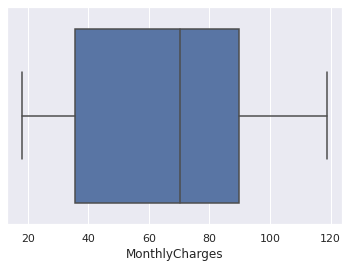

In [ ]:
sns.boxplot(df_telecom['MonthlyCharges'])

Pas d'outliers.

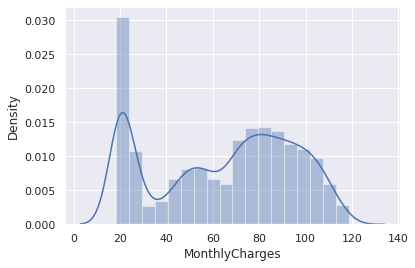

In [ ]:
sns.distplot(df_telecom['MonthlyCharges'])

### Churn

In [ ]:
df_telecom["Churn"].value_counts() # Colonne importante

No     6469
Yes     563
Name: Churn, dtype: int64

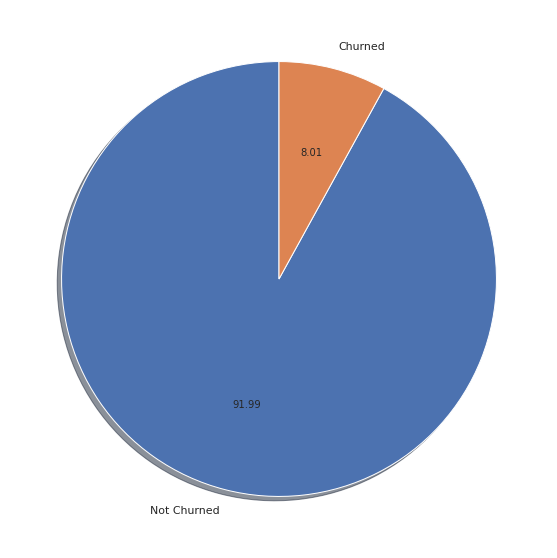

In [ ]:
plt.figure(figsize=(10,10))

plt.pie(df_telecom["Churn"].value_counts(), startangle = 90, autopct = '%.2f',labels=['Not Churned','Churned'], shadow = True)
plt.show()

# Etude des résiliations et taux d'attrition

## Taux d'attrition (nombre de résiliations / nombre total de clients)

In [ ]:
print("Le taux d'attrition est de:", round((len(df_telecom[df_telecom['Churn'] == 'Yes']) / len(df_telecom['Churn']))* 100, 2), "%.")

Le taux d'attrition est de: 8.01 %.


In [ ]:
# Alternative --> Pourcentages :

round((df_telecom["Churn"].value_counts(normalize = True)* 100), 2)

No     91.99
Yes     8.01
Name: Churn, dtype: float64

8% de résiliations. 

## Visualisations de la colonne 'Churn'

Text(0.5, 1.0, 'Répartition du Churn')

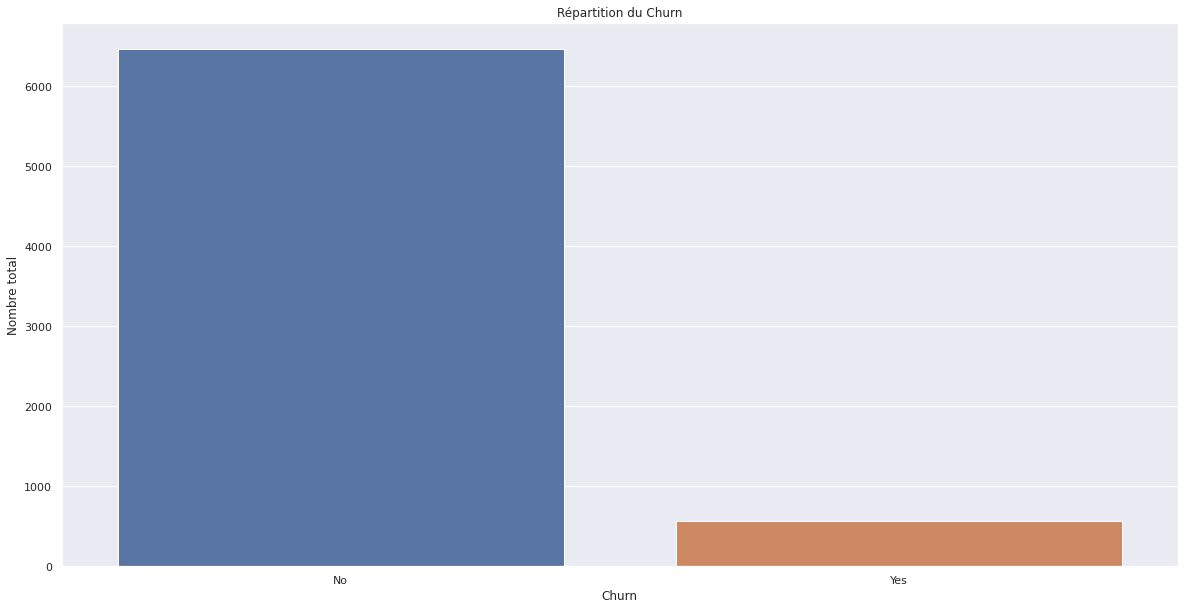

In [ ]:
plt.subplots(figsize = (20, 10))

sns.countplot(data=df_telecom, x = "Churn")
plt.ylabel("Nombre total")
plt.xlabel("Churn")
plt.title("Répartition du Churn")

In [ ]:
df_telecom.dtypes

customerID                    object
gender                         int64
SeniorCitizen                  int64
Partner                      float64
Dependents                   float64
tenure                         int64
PhoneService                 float64
MultipleLines                  int64
InternetService                int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
Contract                       int64
PaperlessBilling               int64
MonthlyCharges               float64
TotalCharges                 float64
Churn                         object
Bank transfer (automatic)      int64
Credit card (automatic)        int64
Electronic check               int64
Mailed check                   int64
dtype: object

In [ ]:
# Distinguer les colonnes objects et numériques :

cat_cols = [cname for cname in df_telecom.columns if df_telecom[cname].dtype=='object' and not cname != ['customerID', 'Churn']]
num_cols = [cname for cname in df_telecom.columns if df_telecom[cname].dtype!='object']

print('Objects features : ', cat_cols)
print('Numerical features : ', num_cols)

Objects features :  []
Numerical features :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


In [ ]:
# Graphiques des colonnes objects :

plt.figure(figsize=(20,20))

for i,cat in enumerate(cat_cols):
    plt.subplot(6,3,i+1)
    sns.countplot(data = df_telecom, x= cat, hue = "Churn")
plt.show()

<Figure size 1440x1440 with 0 Axes>

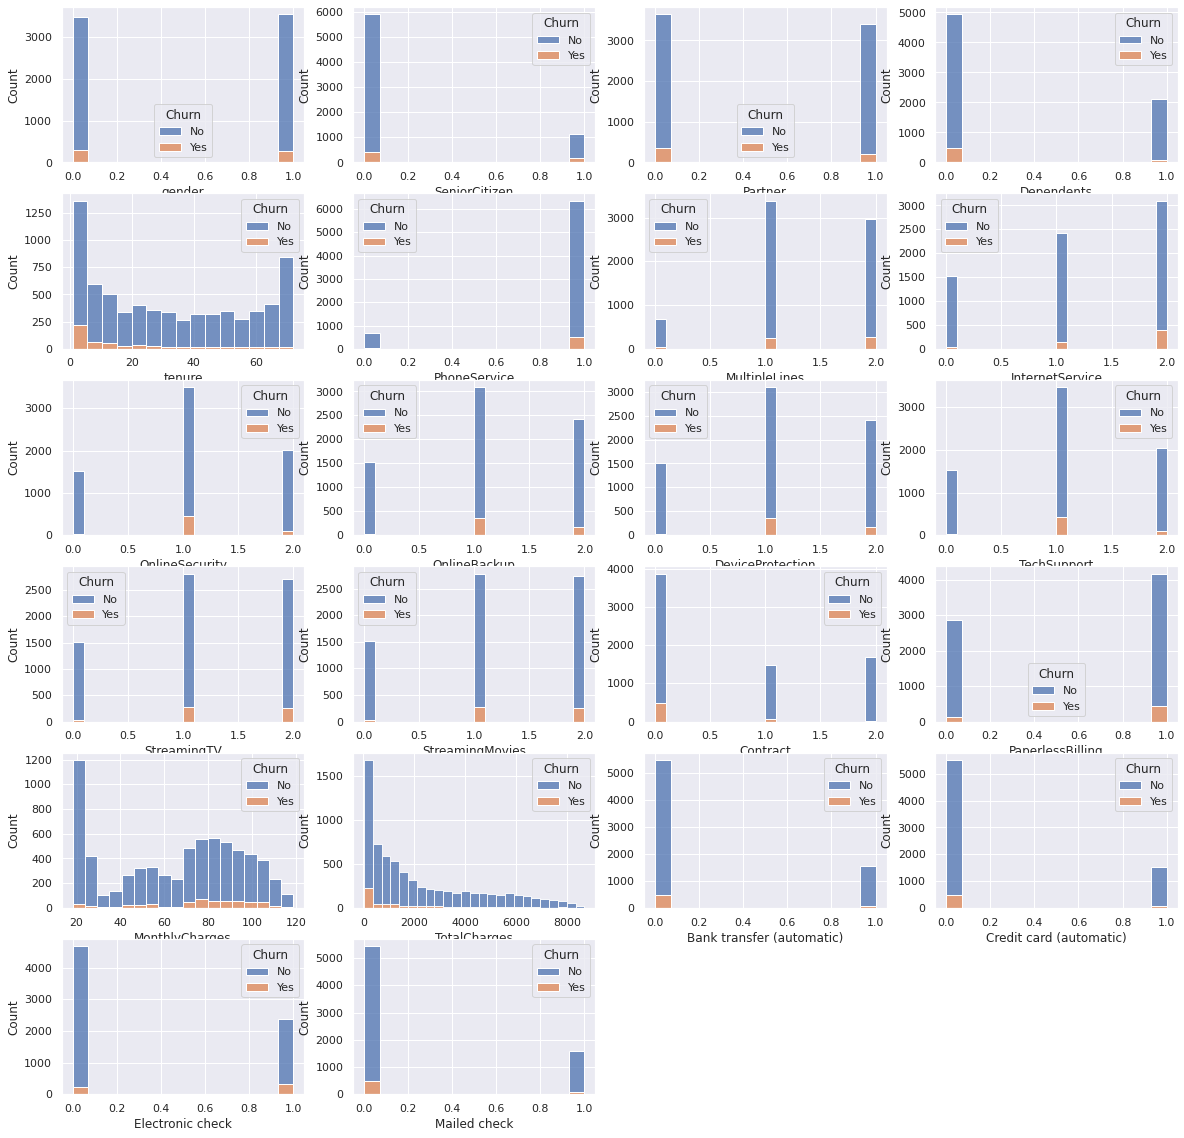

In [ ]:
# Graphiques des colonnes numériques :

plt.figure(figsize=(20,20))

for j,con in enumerate(num_cols):
    plt.subplot(6,4,j+1)
    sns.histplot(data = df_telecom, x = con, hue = "Churn", multiple="stack")

plt.show()

## Etude des clients qui ont résilié et qui n'ont pas résilié en chiffres

In [ ]:
table_churn = df_telecom[df_telecom['Churn'] == 'Yes']
table_no_churn = df_telecom[df_telecom['Churn'] == 'No']

In [ ]:
# Dataframe des résiliations :

table_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
2,3668-QPYBK,1,0,0.0,0.0,2,1.0,1,1,2,2,1,1,1,1,0,1,53.85,108.15,Yes,0,0,0,1
8,7892-POOKP,0,0,1.0,0.0,28,1.0,2,2,1,1,2,2,2,2,0,1,104.80,3046.05,Yes,0,0,1,0
18,4190-MFLUW,0,0,1.0,1.0,10,1.0,1,1,1,1,2,2,1,1,0,0,55.20,528.35,Yes,0,1,0,0
20,8779-QRDMV,1,1,0.0,0.0,1,0.0,0,1,1,1,2,1,1,2,0,1,39.65,39.65,Yes,0,0,1,0
29,8773-HHUOZ,0,0,0.0,1.0,17,1.0,1,1,1,1,1,1,2,2,0,1,64.70,1093.10,Yes,0,0,0,1


In [ ]:
# Dataframe des clients restants :

table_no_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,0,1.0,0.0,1,0.0,0,1,1,2,1,1,1,1,0,1,29.85,29.85,No,0,0,1,0
1,5575-GNVDE,1,0,0.0,0.0,34,1.0,1,1,2,1,2,1,1,1,1,0,56.95,1889.50,No,0,0,0,1
3,7795-CFOCW,1,0,0.0,0.0,45,0.0,0,1,2,1,2,2,1,1,1,0,42.30,1840.75,No,1,0,0,0
4,9237-HQITU,0,0,0.0,0.0,2,1.0,1,2,1,1,1,1,1,1,0,1,70.70,151.65,No,0,0,1,0
5,9305-CDSKC,0,0,0.0,0.0,8,1.0,2,2,1,1,2,1,2,2,0,1,99.65,820.50,No,0,0,1,0


### Par genre

In [ ]:
# Rappel : 1 = Homme / 0 = Femme

male = print(table_churn[table_churn['gender'] == 1]['gender'].count(), "hommes ont résilié leur abonnement.")
female = print(table_churn[table_churn['gender'] == 0]['gender'].count(), "femmes ont résilié leur abonnement.")

276 hommes ont résilié leur abonnement.
287 femmes ont résilié leur abonnement.


In [ ]:
total_customers = print(table_churn[table_churn['gender'] == 1]['gender'].count() + table_churn[table_churn['gender'] == 0]['gender'].count(), "personnes ont résilié leur abonnement.")
total_customers

563 personnes ont résilié leur abonnement.


In [ ]:
male_no_churn = print(table_no_churn[table_no_churn['gender'] == 1]['gender'].count(), "hommes n'ont pas résilié leur abonnement.")
female_no_churn = print(table_no_churn[table_no_churn['gender'] == 0]['gender'].count(), "femmes n'ont pas résilié leur abonnement.")

3273 hommes n'ont pas résilié leur abonnement.
3196 femmes n'ont pas résilié leur abonnement.


In [ ]:
total_customers_no_churn = print(table_no_churn[table_no_churn['gender'] == 1]['gender'].count() + table_no_churn[table_no_churn['gender'] == 0]['gender'].count(), "personnes n'ont pas résilié leur abonnement.")
total_customers_no_churn

6469 personnes n'ont pas résilié leur abonnement.


Pour les résiliations et non résiliations, les proportions entre hommes et femmes sont quasi identiques. Ce paramètre n'influence pas les résiliations.

### Par statut de couple

In [ ]:
# Rappel : 0 = Célibataire / 1 = En couple

single = print(table_churn[table_churn['Partner'] == 0]['Partner'].count(), "célibataires ont résilié leur abonnement.")
couple = print(table_churn[table_churn['Partner'] == 1]['Partner'].count(), "couples ont résilié leur abonnement.")

358 célibataires ont résilié leur abonnement.
205 couples ont résilié leur abonnement.


In [ ]:
single_no_churn = print(table_no_churn[table_no_churn['Partner'] == 0]['Partner'].count(), "célibataires n'ont pas résilié leur abonnement.")
couple_no_churn = print(table_no_churn[table_no_churn['Partner'] == 1]['Partner'].count(), "couples n'ont pas résilié leur abonnement.")

3281 célibataires n'ont pas résilié leur abonnement.
3188 couples n'ont pas résilié leur abonnement.


On observe plus de résiliations chez les célibataires. Là encore, les proportions sont proches. Il y a + de célibataires dans le Dataframe général. Pas d'influence.

### SeniorCitizen

In [ ]:
print(round((table_churn[table_churn['SeniorCitizen'] == 1]['SeniorCitizen'].count() /len(table_churn) * 100), 2), "% des clients ayant résilié leur abonnement sont des séniors.")

28.6 % des clients ayant résilié leur abonnement sont des séniors.


Quasiment 1/3 des résiliations sont des clients anciens.

### Dependents

In [ ]:
print(round((table_churn['Dependents'].value_counts()[1] / len(table_churn) * 100), 2), "% des clients ayant résilié leur abonnement sont dépendents.")

16.7 % des clients ayant résilié leur abonnement sont dépendents.


Près de 17% des résiliations sont des clients dépendents.

### Contracts

In [ ]:
# Rappel : 0 = "Month-to-month" / 1 = "One year" / 2 = "Two years"

month = print(table_churn[table_churn['Contract'] == 0]['Contract'].count(), "personnes qui ont résilié leur abonnement ont un contrat au mois.")
year = print(table_churn[table_churn['Contract'] == 1]['Contract'].count(), "personnes qui ont résilié leur abonnement ont un contrat à l'année.")
two_years = print(table_churn[table_churn['Contract'] == 2]['Contract'].count(), "personnes qui ont résilié leur abonnement ont un contrat de deux ans.")

493 personnes qui ont résilié leur abonnement ont un contrat au mois.
58 personnes qui ont résilié leur abonnement ont un contrat à l'année.
12 personnes qui ont résilié leur abonnement ont un contrat de deux ans.


In [ ]:
print(round((table_churn[table_churn['Contract'] == 0]['Contract'].count() / len(table_churn) * 100), 2), "% des clients ayant résilié leur abonnement ont un contrat au mois.")
print(round((table_churn[table_churn['Contract'] == 1]['Contract'].count() / len(table_churn) * 100), 2), "% des clients ayant résilié leur abonnement ont un contrat à l'année.")
print(round((table_churn[table_churn['Contract'] == 2]['Contract'].count() / len(table_churn) * 100), 2), "% des clients ayant résilié leur abonnement ont un contrat de deux ans.")

87.57 % des clients ayant résilié leur abonnement ont un contrat au mois.
10.3 % des clients ayant résilié leur abonnement ont un contrat à l'année.
2.13 % des clients ayant résilié leur abonnement ont un contrat de deux ans.


Ce sont les abonnés mensuels qui résilient le plus. 

Parce qu'ils ont voulu simplement tester leur abonnement et n'ont pas été satisfaits ? 

Parce que ce sont les clients les + récents ?

# Heatmap pour trouver les corrélations

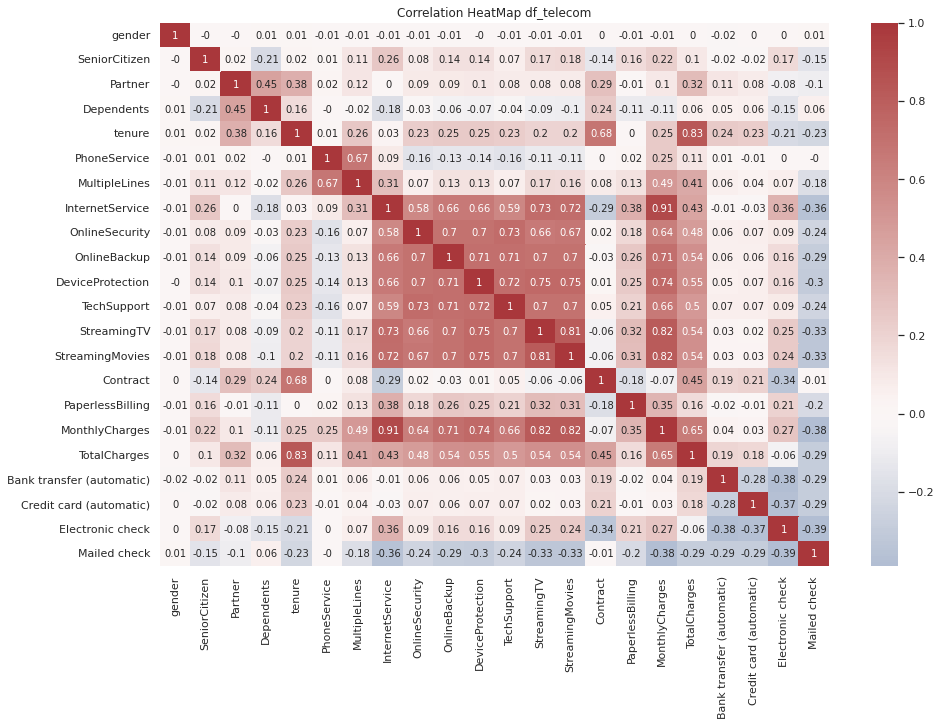

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(round(df_telecom.corr(), 2), annot = True, cmap = "vlag", center = 0)
plt.title("Correlation HeatMap df_telecom")

plt.show()

# Machine Learning

In [ ]:
df_telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check'],
      dtype='object')

In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   gender                     7032 non-null   int64  
 2   SeniorCitizen              7032 non-null   int64  
 3   Partner                    7032 non-null   float64
 4   Dependents                 7032 non-null   float64
 5   tenure                     7032 non-null   int64  
 6   PhoneService               7032 non-null   float64
 7   MultipleLines              7032 non-null   int64  
 8   InternetService            7032 non-null   int64  
 9   OnlineSecurity             7032 non-null   int64  
 10  OnlineBackup               7032 non-null   int64  
 11  DeviceProtection           7032 non-null   int64  
 12  TechSupport                7032 non-null   int64  
 13  StreamingTV                7032 non-null   int64

In [ ]:
# Définition de X et y :

X = df_telecom.select_dtypes(include=[int, float])
y = df_telecom["Churn"] # target

## Sans PCA

### Train-Test-Split + Scaler les données

In [ ]:
# Train-Test-Split standard :

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)
print("The length of the initial dataset is :", len(X))
print("The length of the test dataset is    :", len(X_test))
print("The length of the train dataset is   :", len(X_train))

The length of the initial dataset is : 7032
The length of the test dataset is    : 1758
The length of the train dataset is   : 5274


In [ ]:
# Standard :

# Create and fit a scaler model :

scaler2 = StandardScaler().fit(X_train)

# Your scaler model can now transform your data :

X_train_scaled = scaler2.transform(X_train)
X_test_scaled = scaler2.transform(X_test)

### KNN avec GridSearch

In [ ]:
# Avec X et y standard :

dico = {'n_neighbors' : range(2, 100), 'weights' : ['uniform', 'distance']}
gridKNN = GridSearchCV(KNeighborsClassifier(), dico).fit(X, y)

In [ ]:
# Utilisation des meilleurs hyperparamètres :

print("Meilleur score KNN :",gridKNN.best_score_)
print("Meilleurs paramétres KNN :",gridKNN.best_params_)

Meilleur score KNN : 0.9199375000631875
Meilleurs paramétres KNN : {'n_neighbors': 30, 'weights': 'uniform'}


### DT avec GridSearch

In [ ]:
# Avec X et y standard :

dico2 = {"max_depth": range(1, 8, 2),
                    "min_samples_leaf": range(1, 15, 2),
                    "min_samples_split": (2, 5, 7, 10, 15, 30, 100),
                    "class_weight" : ["balanced", None],
                    }
gridDTC = GridSearchCV(DecisionTreeClassifier(), dico2).fit(X, y)

In [ ]:
# Utilisation des meilleurs hyperparamètres :

print("Meilleur score DTC :", gridDTC.best_score_)
print("Meilleurs paramétres DTC :", gridDTC.best_params_)

Meilleur score DTC : 0.9199375000631875
Meilleurs paramétres DTC : {'class_weight': None, 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


### LR avec GridSearch

In [ ]:
# Avec X et y standard :

dico3 = {"class_weight": ["uniform", "distance"],
                            "max_iter": range(0, 100),
                            }
gridLR = GridSearchCV(LogisticRegression(), dico3).fit(X, y)

In [ ]:
# Utilisation des meilleurs hyperparamètres :

print("Meilleur score LR :",gridLR.best_score_)
print("Meilleurs paramètres LR :",gridLR.best_params_)

Meilleur score LR : 0.9199375000631875
Meilleurs paramètres LR : {'class_weight': 'uniform', 'max_iter': 0}


### Accuracy scores + features importances

#### DTC

In [ ]:
# DTC standard :

# Model DTC, à remplacer les features par ceux du best_score

modelDTC = DecisionTreeClassifier(class_weight= None, max_depth= 1, min_samples_leaf= 1, min_samples_split= 2, random_state=42)
modelDTC.fit(X_train_scaled, y_train)
print("Decision tree test :", modelDTC.score(X_test_scaled, y_test))
print("Decision tree train :",modelDTC.score(X_train_scaled, y_train))

Decision tree test : 0.9209328782707622
Decision tree train : 0.9196056124383769


##### Importance des features + Classification report + Tables de confusion matrix dans DTC 

In [ ]:
# Table de confusion du modèle DTC dans Test :

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelDTC.predict(X_test_scaled)),
             index = modelDTC.classes_ + " ACTUAL",
             columns = modelDTC.classes_ + " PREDICTED")

,No PREDICTED,Yes PREDICTED
No ACTUAL,1619,0
Yes ACTUAL,139,0


In [ ]:
# Table de confusion du modèle DTC dans Train :

pd.DataFrame(data = confusion_matrix(y_true = y_train, y_pred = modelDTC.predict(X_train_scaled)),
             index = modelDTC.classes_ + " ACTUAL",
             columns = modelDTC.classes_ + " PREDICTED")

,No PREDICTED,Yes PREDICTED
No ACTUAL,4850,0
Yes ACTUAL,424,0


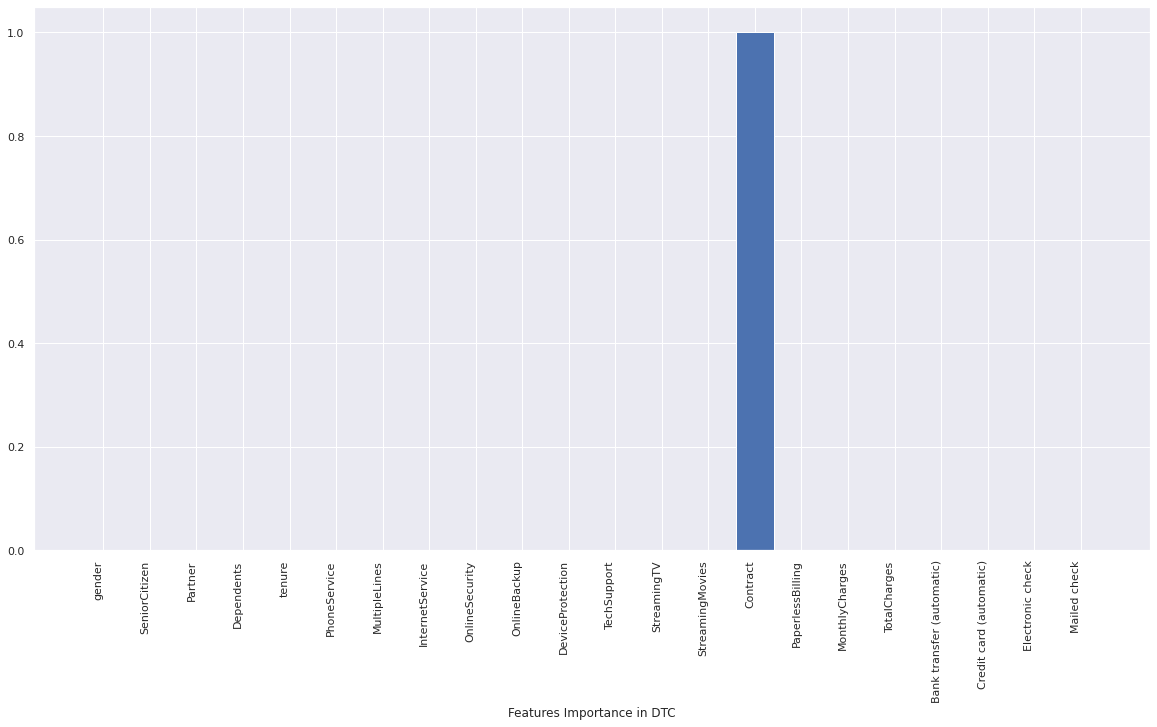

In [ ]:
# Vérification de l'importance des différentes features :

sort = modelDTC.feature_importances_.argsort()
fig = plt.figure(1, figsize=(20, 10))
plt.bar(X.columns.tolist(), modelDTC.feature_importances_)
plt.xticks(rotation = 90, ha = 'right')

plt.xlabel("Features Importance in DTC")
plt.show()

La colonne Contract est très importante.

In [ ]:
# Classification report dans Train :

print(classification_report(y_true = y_train, y_pred = modelDTC.predict(X_train_scaled)))

              precision    recall  f1-score   support

          No       0.92      1.00      0.96      4850
         Yes       0.00      0.00      0.00       424

    accuracy                           0.92      5274
   macro avg       0.46      0.50      0.48      5274
weighted avg       0.85      0.92      0.88      5274



In [ ]:
# Classification report dans Test :

print(classification_report(y_true = y_test, y_pred = modelDTC.predict(X_test_scaled)))

              precision    recall  f1-score   support

          No       0.92      1.00      0.96      1619
         Yes       0.00      0.00      0.00       139

    accuracy                           0.92      1758
   macro avg       0.46      0.50      0.48      1758
weighted avg       0.85      0.92      0.88      1758



#### KNN

In [ ]:
# KNN standard :

# Model KNN, à remplacer les features par ceux du best_score
modelKNN = KNeighborsClassifier(n_neighbors=30, weights = 'uniform').fit(X_train_scaled, y_train)
print("Score KNN test :", modelKNN.score(X_test_scaled, y_test))
print("Score KNN train :",modelKNN.score(X_train_scaled, y_train))

Score KNN test : 0.9209328782707622
Score KNN train : 0.9196056124383769


#### LR

In [ ]:
# LR standard :

# Model LogReg, à remplacer les features par ceux du best_score :

modelLR = LogisticRegression(max_iter = 0, class_weight = 'uniform').fit(X_train_scaled, y_train)
print("Logistic regression test :", modelLR.score(X_test_scaled, y_test))
print("Logistic regression train :", modelLR.score(X_train_scaled, y_train))

Logistic regression test : 0.9152445961319682
Logistic regression train : 0.9178991277967388


##### Importance des colonnes dans LR + Tables de confusion matrix

Feature: 0, Score: -0.00971
Feature: 1, Score: 0.06009
Feature: 2, Score: -0.03814
Feature: 3, Score: -0.05298
Feature: 4, Score: -0.10801
Feature: 5, Score: 0.01283
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.09914
Feature: 8, Score: 0.00360
Feature: 9, Score: 0.02573
Feature: 10, Score: 0.03476
Feature: 11, Score: 0.01286
Feature: 12, Score: 0.05385
Feature: 13, Score: 0.05168
Feature: 14, Score: -0.11939
Feature: 15, Score: 0.06215
Feature: 16, Score: 0.06675
Feature: 17, Score: -0.05470
Feature: 18, Score: -0.03509
Feature: 19, Score: -0.03487
Feature: 20, Score: 0.09539
Feature: 21, Score: -0.03903


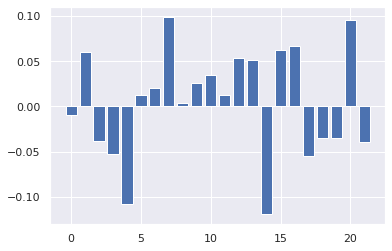

In [ ]:
# Get importance
importance = modelLR.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# Table de confusion matrix du modèle LR Test :

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelLR.predict(X_test_scaled)),
             index = modelLR.classes_ + " ACTUAL",
             columns = modelLR.classes_ + " PREDICTED")

,No PREDICTED,Yes PREDICTED
No ACTUAL,1608,11
Yes ACTUAL,138,1


In [ ]:
# Table de confusion matrix du modèle LR Train :

pd.DataFrame(data = confusion_matrix(y_true = y_train, y_pred = modelLR.predict(X_train_scaled)),
             index = modelLR.classes_ + " ACTUAL",
             columns = modelLR.classes_ + " PREDICTED")

,No PREDICTED,Yes PREDICTED
No ACTUAL,4830,20
Yes ACTUAL,413,11


### Probas

In [ ]:
# Ajout des predictions dans le DF :
df_telecom['KNN_pred'] = modelKNN.predict(X)
df_telecom['DT_pred'] = modelDTC.predict(X)
df_telecom['LR_pred'] = modelLR.predict(X)

In [ ]:
# % de prédiction vis à vis des résiliations connues :
df_pred = df_telecom[['Churn','KNN_pred','DT_pred','LR_pred']]
df_pred

,Churn,KNN_pred,DT_pred,LR_pred
0,No,No,No,No
1,No,No,No,No
2,Yes,No,No,No
3,No,No,No,No
4,No,No,No,No
...,...,...,...,...
7038,No,No,No,No
7039,No,No,No,No
7040,No,No,No,No
7041,No,No,No,No


In [ ]:
# Convertir la colonne "Churn" en 0 = No / 1 = Yes :

df_pred["Churn"] = df_pred["Churn"].apply(lambda x: 0 if x == "No" else 1)
df_pred["KNN_pred"] = df_pred["KNN_pred"].apply(lambda x: 0 if x == "No" else 1)
df_pred["DT_pred"] = df_pred["DT_pred"].apply(lambda x: 0 if x == "No" else 1)
df_pred["LR_pred"] = df_pred["LR_pred"].apply(lambda x: 0 if x == "No" else 1)

In [ ]:
df_pred[df_pred['Churn'] == 1]

,Churn,KNN_pred,DT_pred,LR_pred
2,1,0,0,0
8,1,0,0,0
18,1,0,0,0
20,1,0,0,0
29,1,0,0,0
...,...,...,...,...
6991,1,0,0,0
6993,1,0,0,0
7010,1,0,0,1
7018,1,0,0,1


In [ ]:
print("Pourcentage de prédictions ok pour KNN :", round(df_pred[df_pred["Churn"] == 1].sum()[1] / len(df_pred[df_pred["Churn"] == 1]) * 100, 2), "%.")
print("Pourcentage de prédictions ok pour DT :", round(df_pred[df_pred["Churn"] == 1].sum()[2] / len(df_pred[df_pred["Churn"] == 1]) * 100, 2), "%.")
print("Pourcentage de prédictions ok pour LR :", round(df_pred[df_pred["Churn"] == 1].sum()[3] / len(df_pred[df_pred["Churn"] == 1]) * 100, 2), "%.")

Pourcentage de prédictions ok pour KNN : 0.0 %.
Pourcentage de prédictions ok pour DT : 0.0 %.
Pourcentage de prédictions ok pour LR : 12.08 %.


In [ ]:
# Visualisation du % de prédiction (vs model LR) vis à vis des clients encore présents et récupération de leur N° client dans un DF :

prediction = df_pred[df_pred["Churn"] == 0][['Churn','LR_pred']]
prediction = prediction[prediction['LR_pred'] == 1]
prediction = prediction.reset_index()
df_telecom = df_telecom.reset_index()


In [ ]:
prediction = pd.merge(prediction, df_telecom, how='left', left_on='index', right_on='index')
prediction = prediction[['customerID','Churn_x']]
prediction

,customerID,Churn_x
0,2424-WVHPL,0
1,0390-DCFDQ,0
2,1285-OKIPP,0
3,8937-RDTHP,0
4,5583-SXDAG,0
...,...,...
196,6618-RYATB,0
197,0295-PPHDO,0
198,6457-GIRWB,0
199,6502-MJQAE,0


On a 201 cas potentiels de résiliation ici.



#### Probas sur la LR

In [ ]:
# Probas des classes Churn = 1 / Non churn = 0.
modelLR.classes_

array(['No', 'Yes'], dtype=object)

- Colonne 1 = Pas de résiliation.
- Colonne 2 = Résiliation.

In [ ]:
# % de probabilité dé résiliation par ligne ?

probaLR = modelLR.predict_proba(X) * 100
probaLR

array([[5.70234051e+001, 4.29765949e+001],
       [1.00000000e+002, 6.74471243e-044],
       [9.58575112e+001, 4.14248884e+000],
       ...,
       [9.99999993e+001, 7.02393014e-007],
       [9.99997039e+001, 2.96104159e-004],
       [1.00000000e+002, 1.23657775e-161]])

In [ ]:
# Création d'un DataFrame et changement du nom de la colomne :

probaLR = pd.DataFrame(probaLR)
probaLR = probaLR.rename(columns ={0:'Non_Churn', 1:'Churn'})
probaLR.reset_index(inplace= True)
probaLR

,index,Non_Churn,Churn
0,0,57.023405,4.297659e+01
1,1,100.000000,6.744712e-44
2,2,95.857511,4.142489e+00
3,3,100.000000,1.095081e-43
4,4,98.496931,1.503069e+00
...,...,...,...
7027,7027,100.000000,5.668344e-45
7028,7028,100.000000,2.839124e-174
7029,7029,99.999999,7.023930e-07
7030,7030,99.999704,2.961042e-04


In [ ]:
# Suppression de colonnes :

probaLR.reset_index(inplace= True)
del probaLR['level_0']
del probaLR['index']
probaLR.reset_index(inplace= True)
probaLR

,index,Non_Churn,Churn
0,0,57.023405,4.297659e+01
1,1,100.000000,6.744712e-44
2,2,95.857511,4.142489e+00
3,3,100.000000,1.095081e-43
4,4,98.496931,1.503069e+00
...,...,...,...
7027,7027,100.000000,5.668344e-45
7028,7028,100.000000,2.839124e-174
7029,7029,99.999999,7.023930e-07
7030,7030,99.999704,2.961042e-04


In [ ]:
merge = pd.merge(df_telecom, probaLR, how = 'left', left_on = 'index', right_on = 'index')
merge = merge[['customerID', 'Churn_x', 'Non_Churn', 'Churn_y']]
merge = merge[merge['Churn_x'] == 'No'] # garder que les lignes qui n'ont pas résilié.
merge['Non_Churn'] = merge['Non_Churn'].apply(lambda x: round(x, 1))
merge['Churn_y'] = merge['Churn_y'].apply(lambda x: round(x, 1))
merge

,customerID,Churn_x,Non_Churn,Churn_y
0,7590-VHVEG,No,57.0,43.0
1,5575-GNVDE,No,100.0,0.0
3,7795-CFOCW,No,100.0,0.0
4,9237-HQITU,No,98.5,1.5
5,9305-CDSKC,No,100.0,0.0
...,...,...,...,...
7027,6840-RESVB,No,NaN,NaN
7028,2234-XADUH,No,NaN,NaN
7029,4801-JZAZL,No,NaN,NaN
7030,8361-LTMKD,No,NaN,NaN


In [ ]:
merge.describe()

,Non_Churn,Churn_y
count,6459.000000,6459.000000
mean,95.733318,4.266682
std,13.688967,13.688967
min,28.900000,0.000000
25%,100.000000,0.000000
50%,100.000000,0.000000
75%,100.000000,0.000000
max,100.000000,71.100000


In [ ]:
merge['Churn_y'].describe()

count    6459.000000
mean        4.266682
std        13.688967
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        71.100000
Name: Churn_y, dtype: float64

Le client avec la probabilité maximum de résiliation est de 71.1 %.

In [ ]:
# Liste des clients ayant plus de 25% de chances de résilier leur abonnement :

print("Il y a ", len(merge[merge['Churn_y'] >= 25]['customerID']), 'clients qui ont 25% de chance de résilier leur abonnement.')
print("La liste de ces clients est :", list(merge[merge['Churn_y'] >= 25]['customerID']))

Il y a  551 clients qui ont 25% de chance de résilier leur abonnement.
La liste de ces clients est : ['7590-VHVEG', '1066-JKSGK', '8665-UTDHZ', '7310-EGVHZ', '3413-BMNZE', '2273-QCKXA', '2424-WVHPL', '6380-ARCEH', '3679-XASPY', '3930-ZGWVE', '3091-FYHKI', '0390-DCFDQ', '2135-RXIHG', '6317-YPKDH', '6582-OIVSP', '3645-DEYGF', '1285-OKIPP', '4195-NZGTA', '6469-MRVET', '2232-DMLXU', '8937-RDTHP', '0322-YINQP', '6366-ZGQGL', '2080-SRCDE', '5583-SXDAG', '8203-XJZRC', '6390-DSAZX', '1098-TDVUQ', '8705-WZCYL', '0021-IKXGC', '7302-ZHMHP', '6158-HDPXZ', '5167-ZFFMM', '5522-JBWMO', '7989-CHGTL', '3577-AMVUX', '4110-PFEUZ', '1452-VOQCH', '3583-EKAPL', '5756-OZRIO', '4636-QRJKY', '1297-VQDRP', '2782-LFZVW', '5791-KAJFD', '2501-XWWTZ', '1218-VKFPE', '2865-TCHJW', '2393-DIVAI', '0215-BQKGS', '1626-ERCMM', '9576-ANLXO', '8095-WANWK', '3088-FVYWK', '2826-UWHIS', '7251-LJBQN', '8040-MNRTF', '5076-YVXCM', '2682-KEVRP', '3347-YJZZE', '2189-WWOEW', '7706-DZNKK', '7521-AFHAB', '2040-OBMLJ', '2798-NYLMZ', '4

## Avec PCA + KMeans

In [ ]:
# Standardisation des données (PCA) :

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(7032, 22)

In [ ]:
# PCA pour récupérer les 2 colonnes les + pertinentes :

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(7032, 2)

### KMeans (clusters)

In [ ]:
# KMeans pour savoir si les 2 colonnes récupérées influent sur la résiliation des abonnements (PCA) :

modelKM = KMeans(n_clusters = 2)
modelKM.fit(X_pca)
center = modelKM.cluster_centers_
center

array([[-1.2273313 , -0.25785915],
       [ 4.37331355,  0.91882193]])

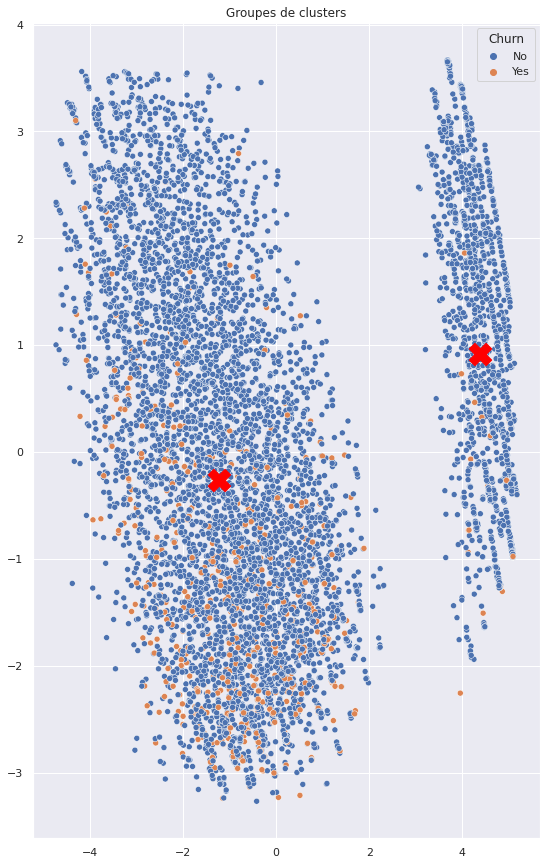

In [ ]:
# Graphique PCA :

fig, ax = plt.subplots(figsize = (20, 15))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue = y)
ax1.set_title("Groupes de clusters")
ax2 = plt.scatter(x = center[:,0], y = center[:,1], marker ='X', color = 'red', s = 500)

Ces deux groupes n'expliquent pas la résiliation des abonnements.

In [ ]:
# PCA pour récupérer les colonnes les + pertinentes représentant 80% des données :

pca = PCA(n_components = 0.80)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(7032, 9)

9 colonnes représentent 80% des données du DF (sur les 22 au départ).

### Train-Test-Split

In [ ]:
# Train-Test-Split avec PCA :

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size = 0.75, random_state = 42)
print("The length of the initial dataset is :", len(X_pca))
print("The length of the test dataset is    :", len(X_test))
print("The length of the train dataset is   :", len(X_train))

The length of the initial dataset is : 7032
The length of the test dataset is    : 1758
The length of the train dataset is   : 5274


### KNN avec GridSearch

In [ ]:
# Avec X_train et y_train PCA :

dico = {'n_neighbors' : range(2, 100), 'weights' : ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), dico).fit(X_train, y_train) 
print("Meilleur score :",grid.best_score_)
print("Meilleurs paramétres :",grid.best_params_)

Meilleur score : 0.9196057447593009
Meilleurs paramétres : {'n_neighbors': 24, 'weights': 'uniform'}


### Decision Tree avec GridSearch

In [ ]:
# Avec X_train et y_train PCA :

dico2 = {'max_depth' : range(2, 100)}
gridDT = GridSearchCV(DecisionTreeClassifier(), dico2).fit(X_train, y_train)
print("Meilleur score :", gridDT.best_score_)
print("Meilleurs paramètres :", gridDT.best_params_)

Meilleur score : 0.9196057447593009
Meilleurs paramètres : {'max_depth': 2}


### Logistic Regression

In [ ]:
# Avec X_train et y_train PCA :

modelLR = LogisticRegression(max_iter = 1000).fit(X_train, y_train)

### Accuracy scores pour les 3 modèles ci-dessus + importance des features

#### DTC

In [ ]:
# Model DTC, à remplacer les features par ceux du best_score

modelDT = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
print("Accuracy score pour le jeu d'entrainement sur DT :", modelDT.score(X_train, y_train))
print("Accuracy score pour le jeu de test sur DT :", modelDT.score(X_test, y_test))

Accuracy score pour le jeu d'entrainement sur DT : 0.9196056124383769
Accuracy score pour le jeu de test sur DT : 0.9209328782707622


##### Importance des features + Classification report + Tables de confusion matrix dans DTC 

In [ ]:
# Table de confusion du modèle DTC dans Test :

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelDT.predict(X_test)),
             index = modelDT.classes_ + " ACTUAL",
             columns = modelDT.classes_ + " PREDICTED")

,No PREDICTED,Yes PREDICTED
No ACTUAL,1619,0
Yes ACTUAL,139,0


In [ ]:
# Table de confusion du modèle DTC dans Train :

pd.DataFrame(data = confusion_matrix(y_true = y_train, y_pred = modelDT.predict(X_train)),
             index = modelDT.classes_ + " ACTUAL",
             columns = modelDT.classes_ + " PREDICTED")

,No PREDICTED,Yes PREDICTED
No ACTUAL,4850,0
Yes ACTUAL,424,0


In [ ]:
"""

# Vérification de l'importance des différentes features :

sort = modelDT.feature_importances_.argsort()
fig = plt.figure(1, figsize=(20, 10))
plt.bar(X.columns.tolist(), modelDT.feature_importances_)
plt.xticks(rotation = 90, ha = 'right')

plt.xlabel("Features Importance in DT")
plt.show()

"""

'\n\n# Vérification de l\'importance des différentes features :\n\nsort = modelDT.feature_importances_.argsort()\nfig = plt.figure(1, figsize=(20, 10))\nplt.bar(X.columns.tolist(), modelDT.feature_importances_)\nplt.xticks(rotation = 90, ha = \'right\')\n\nplt.xlabel("Features Importance in DT")\nplt.show()\n\n'

In [ ]:
# Classification report dans Train :

print(classification_report(y_true = y_train, y_pred = modelDT.predict(X_train)))

              precision    recall  f1-score   support

          No       0.92      1.00      0.96      4850
         Yes       0.00      0.00      0.00       424

    accuracy                           0.92      5274
   macro avg       0.46      0.50      0.48      5274
weighted avg       0.85      0.92      0.88      5274



In [ ]:
# Classification report dans Test :

print(classification_report(y_true = y_test, y_pred = modelDT.predict(X_test)))

              precision    recall  f1-score   support

          No       0.92      1.00      0.96      1619
         Yes       0.00      0.00      0.00       139

    accuracy                           0.92      1758
   macro avg       0.46      0.50      0.48      1758
weighted avg       0.85      0.92      0.88      1758



#### KNN

In [ ]:
modelKNN = KNeighborsClassifier(weights = 'uniform', n_neighbors = 1).fit(X_train, y_train)
print("Accuracy score pour le jeu d'entrainement sur KNN :", modelKNN.score(X_train, y_train))
print("Accuracy score pour le jeu de test sur KNN :", modelKNN.score(X_test, y_test))

Accuracy score pour le jeu d'entrainement sur KNN : 1.0
Accuracy score pour le jeu de test sur KNN : 0.863481228668942


#### LR

In [ ]:
print("Accuracy score pour le jeu d'entrainement sur LR :", modelLR.score(X_train, y_train))
print("Accuracy score pour le jeu de test sur LR :", modelLR.score(X_test, y_test))

Accuracy score pour le jeu d'entrainement sur LR : 0.9196056124383769
Accuracy score pour le jeu de test sur LR : 0.9209328782707622


##### Importance des colonnes dans LR + Tables de confusion matrix

Feature: 0, Score: -0.13542
Feature: 1, Score: -0.60846
Feature: 2, Score: -0.15237
Feature: 3, Score: -0.00483
Feature: 4, Score: 0.10592
Feature: 5, Score: 0.04996
Feature: 6, Score: -0.08434
Feature: 7, Score: -0.20412
Feature: 8, Score: 0.27069


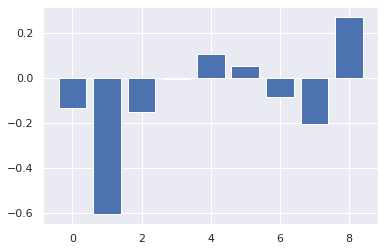

In [ ]:
# Get importance
importance = modelLR.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# Table de confusion matrix du modèle LR Test :

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelLR.predict(X_test)),
             index = modelLR.classes_ + " ACTUAL",
             columns = modelLR.classes_ + " PREDICTED")

,No PREDICTED,Yes PREDICTED
No ACTUAL,1619,0
Yes ACTUAL,139,0


In [ ]:
# Table de confusion matrix du modèle LR Train :

pd.DataFrame(data = confusion_matrix(y_true = y_train, y_pred = modelLR.predict(X_train)),
             index = modelLR.classes_ + " ACTUAL",
             columns = modelLR.classes_ + " PREDICTED")

,No PREDICTED,Yes PREDICTED
No ACTUAL,4850,0
Yes ACTUAL,424,0


### Probas

In [ ]:
# Ajout des predictions dans le DF :
df_telecom['KNN_pred_PCA'] = modelKNN.predict(X_pca)
df_telecom['DT_pred_PCA'] = modelDT.predict(X_pca)
df_telecom['LR_pred_PCA'] = modelLR.predict(X_pca)

In [ ]:
# % de prédiction vis à vis des résiliations connues :
df_pred = df_telecom[['Churn','KNN_pred_PCA','DT_pred_PCA','LR_pred_PCA']]
df_pred

,Churn,KNN_pred_PCA,DT_pred_PCA,LR_pred_PCA
0,No,No,No,No
1,No,No,No,No
2,Yes,Yes,No,No
3,No,No,No,No
4,No,No,No,No
...,...,...,...,...
7038,No,No,No,No
7039,No,No,No,No
7040,No,No,No,No
7041,No,No,No,No


In [ ]:
# Convertir la colonne "Churn" en 0 = No / 1 = Yes :

df_pred["Churn"] = df_pred["Churn"].apply(lambda x: 0 if x == "No" else 1)
df_pred["KNN_pred_PCA"] = df_pred["KNN_pred_PCA"].apply(lambda x: 0 if x == "No" else 1)
df_pred["DT_pred_PCA"] = df_pred["DT_pred_PCA"].apply(lambda x: 0 if x == "No" else 1)
df_pred["LR_pred_PCA"] = df_pred["LR_pred_PCA"].apply(lambda x: 0 if x == "No" else 1)

In [ ]:
df_pred[df_pred['Churn'] == 1]

,Churn,KNN_pred_PCA,DT_pred_PCA,LR_pred_PCA
2,1,1,0,0
8,1,0,0,0
18,1,1,0,0
20,1,1,0,0
29,1,1,0,0
...,...,...,...,...
6991,1,1,0,0
6993,1,0,0,0
7010,1,0,0,0
7018,1,0,0,0


In [ ]:
print("Pourcentage de prédictions ok pour KNN :", round(df_pred[df_pred["Churn"] == 1].sum()[1] / len(df_pred[df_pred["Churn"] == 1]) * 100, 2), "%.")
print("Pourcentage de prédictions ok pour DT :", round(df_pred[df_pred["Churn"] == 1].sum()[2] / len(df_pred[df_pred["Churn"] == 1]) * 100, 2), "%.")
print("Pourcentage de prédictions ok pour LR :", round(df_pred[df_pred["Churn"] == 1].sum()[3] / len(df_pred[df_pred["Churn"] == 1]) * 100, 2), "%.")

Pourcentage de prédictions ok pour KNN : 77.62 %.
Pourcentage de prédictions ok pour DT : 0.0 %.
Pourcentage de prédictions ok pour LR : 0.0 %.


In [ ]:
# Visualisation du % de prédiction (vs model KNN) vis à vis des clients encore présents et récupération de leur N° client dans un DF :

prediction = df_pred[df_pred["Churn"] == 0][['Churn','KNN_pred_PCA']]
prediction = prediction[prediction['KNN_pred_PCA'] == 1]
prediction = prediction.reset_index()
df_telecom = df_telecom.reset_index()


In [ ]:
prediction = pd.merge(prediction, df_telecom, how='left', left_on='index', right_on='index')
prediction = prediction[['customerID','Churn_x']]
prediction

,customerID,Churn_x
0,6467-CHFZW,0
1,4080-IIARD,0
2,0404-SWRVG,0
3,5046-NUHWD,0
4,3167-SNQPL,0
...,...,...
109,6339-YPSAH,0
110,0083-PIVIK,0
111,1389-CXMLU,0
112,4710-NKCAW,0


On a 114 cas potentiels de résiliation ici.



#### Probas sur la LR

In [ ]:
# Probas des classes Churn = 1 / Non churn = 0.
modelLR.classes_

array(['No', 'Yes'], dtype=object)

- Colonne 1 = Pas de résiliation.
- Colonne 2 = Résiliation.

In [ ]:
# % de probabilité dé résiliation par ligne ?

probaLR = modelLR.predict_proba(X_pca) * 100
probaLR

array([[87.82227351, 12.17772649],
       [97.69925655,  2.30074345],
       [88.64386707, 11.35613293],
       ...,
       [90.20400406,  9.79599594],
       [81.87994659, 18.12005341],
       [98.06605994,  1.93394006]])

- Client 1ère ligne : 12,2% de chances de résiliation de son abonnement.
- Client 2è ligne : 2.3%
- etc..

In [ ]:
# Création d'un DataFrame et changement du nom de la colomne :

probaLR = pd.DataFrame(probaLR)
probaLR = probaLR.rename(columns ={0:'Non_Churn', 1:'Churn'})
probaLR.reset_index(inplace= True)
probaLR

,index,Non_Churn,Churn
0,0,87.822274,12.177726
1,1,97.699257,2.300743
2,2,88.643867,11.356133
3,3,98.408746,1.591254
4,4,77.828762,22.171238
...,...,...,...
7027,7027,94.598188,5.401812
7028,7028,97.028241,2.971759
7029,7029,90.204004,9.795996
7030,7030,81.879947,18.120053


In [ ]:
# Suppression de colonnes :

probaLR.reset_index(inplace= True)
del probaLR['level_0']
del probaLR['index']
probaLR.reset_index(inplace= True)
probaLR

,index,Non_Churn,Churn
0,0,87.822274,12.177726
1,1,97.699257,2.300743
2,2,88.643867,11.356133
3,3,98.408746,1.591254
4,4,77.828762,22.171238
...,...,...,...
7027,7027,94.598188,5.401812
7028,7028,97.028241,2.971759
7029,7029,90.204004,9.795996
7030,7030,81.879947,18.120053


In [ ]:
merge = pd.merge(df_telecom, probaLR, how = 'left', left_on = 'index', right_on = 'index')
merge = merge[['customerID', 'Churn_x', 'Non_Churn', 'Churn_y']]
merge = merge[merge['Churn_x'] == 'No'] # garder que les lignes qui n'ont pas résilié.
merge['Non_Churn'] = merge['Non_Churn'].apply(lambda x: round(x, 1))
merge['Churn_y'] = merge['Churn_y'].apply(lambda x: round(x, 1))
merge

,customerID,Churn_x,Non_Churn,Churn_y
0,7590-VHVEG,No,87.8,12.2
1,5575-GNVDE,No,97.7,2.3
3,7795-CFOCW,No,98.4,1.6
4,9237-HQITU,No,77.8,22.2
5,9305-CDSKC,No,73.9,26.1
...,...,...,...,...
7027,6840-RESVB,No,NaN,NaN
7028,2234-XADUH,No,NaN,NaN
7029,4801-JZAZL,No,NaN,NaN
7030,8361-LTMKD,No,NaN,NaN


In [ ]:
merge.describe()

,Non_Churn,Churn_y
count,6459.000000,6459.000000
mean,92.018130,7.981870
std,7.488778,7.488778
min,62.900000,0.400000
25%,88.100000,2.000000
50%,94.700000,5.300000
75%,98.000000,11.900000
max,99.600000,37.100000


In [ ]:
merge['Churn_y'].describe()

count    6459.000000
mean        7.981870
std         7.488778
min         0.400000
25%         2.000000
50%         5.300000
75%        11.900000
max        37.100000
Name: Churn_y, dtype: float64

25% des clients ont 12% de chances de résiliser leur abonnement.

Le client avec la probabilité maximum de résiliation est de 37.1 %.

In [ ]:
# Liste des clients ayant plus de 25% de chances de résilier leur abonnement :

print("Il y a ", len(merge[merge['Churn_y'] >= 25]['customerID']), 'clients qui ont 25% de chance de résilier leur abonnement.')
print("La liste de ces clients est :", list(merge[merge['Churn_y'] >= 25]['customerID']))

Il y a  240 clients qui ont 25% de chance de résilier leur abonnement.
La liste de ces clients est : ['9305-CDSKC', '4929-XIHVW', '1658-BYGOY', '1875-QIVME', '0094-OIFMO', '4385-GZQXV', '3488-PGMQJ', '4847-TAJYI', '8098-LLAZX', '2799-ARNLO', '5701-YVSVF', '0021-IKXGC', '2034-GDRCN', '4115-NZRKS', '3811-VBYBZ', '0306-JAELE', '5736-YEJAX', '8535-SFUTN', '1297-VQDRP', '3627-FHKBK', '2393-DIVAI', '3487-EARAT', '1038-ZAGBI', '9777-IQHWP', '7945-HLKEA', '5170-PTRKA', '5285-MVEHD', '4694-PHWFW', '5993-BQHEA', '4824-GUCBY', '0454-OKRCT', '4750-ZRXIU', '3318-ISQFQ', '7277-KAMWT', '1374-DMZUI', '9391-TTOYH', '7460-ITWWP', '1751-NCDLI', '0841-NULXI', '6870-ZWMNX', '6791-YBNAK', '4525-VZCZG', '6625-UTXEW', '9531-NSBMR', '8519-IMDHU', '3161-ONRWK', '5624-RYAMH', '7249-WBIYX', '9518-RWHZL', '6718-BDGHG', '5469-CTCWN', '8898-KASCD', '5035-PGZXH', '7041-TXQJH', '5193-QLVZB', '9818-XQCUV', '3223-DWFIO', '7643-RCHXS', '2761-OCIAX', '3374-PZLXD', '2581-VKIRT', '6223-DHJGV', '8932-CZHRQ', '0386-CWRGM', '6

## Courbe ROC

In [ ]:
# Convertir la colonne Churn en données numériques :

df_telecom["Churn"] = df_telecom["Churn"].apply(lambda x: 0 if x == "No" else 1)

In [ ]:
df_telecom["Churn"].dtype

dtype('int64')

In [ ]:
df_telecom.columns

Index(['level_0', 'index', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check', 'KNN_pred', 'DT_pred', 'LR_pred'],
      dtype='object')

In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   level_0                    7032 non-null   int64  
 1   index                      7032 non-null   int64  
 2   customerID                 7032 non-null   object 
 3   gender                     7032 non-null   int64  
 4   SeniorCitizen              7032 non-null   int64  
 5   Partner                    7032 non-null   float64
 6   Dependents                 7032 non-null   float64
 7   tenure                     7032 non-null   int64  
 8   PhoneService               7032 non-null   float64
 9   MultipleLines              7032 non-null   int64  
 10  InternetService            7032 non-null   int64  
 11  OnlineSecurity             7032 non-null   int64  
 12  OnlineBackup               7032 non-null   int64  
 13  DeviceProtection           7032 non-null   int64

In [ ]:
# Définir X et y :

# Colonnes uniquement numériques sauf Churn car target :
Xroc = df_telecom[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check']]

# Target Churn :
yroc = df_telecom["Churn"]

Xroc_train, Xroc_test, yroc_train, yroc_test = train_test_split(Xroc, yroc, train_size = 0.75, random_state = 42)
print("The length of the initial dataset is :", len(Xroc))
print("The length of the test dataset is    :", len(Xroc_test))
print("The length of the train dataset is   :", len(Xroc_train))

The length of the initial dataset is : 7032
The length of the test dataset is    : 1758
The length of the train dataset is   : 5274


In [ ]:
# Create and fit a scaler model
scalerROC = StandardScaler().fit(Xroc_train)

# Your scaler model can now transform your data
Xroc_train_scaled = scalerROC.transform(Xroc_train)
Xroc_test_scaled = scalerROC.transform(Xroc_test)

In [ ]:
# Vérification de yroc_train car il faut au moins 2 classes pour le code suivant :

set(yroc_train)

{0, 1}

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(max_iter = 1000, class_weight='uniform'), 
               #GaussianNB(), 
               KNeighborsClassifier(n_neighbors = 30, weights ='uniform'), 
               DecisionTreeClassifier(class_weight= None, max_depth = 1, min_samples_leaf = 1, min_samples_split = 2),
               #RandomForestClassifier(random_state=1234)
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    modelROC = cls.fit(Xroc_train_scaled, yroc_train)
    yproba = modelROC.predict_proba(Xroc_test_scaled)[::,1]
    
    fpr, tpr, _ = roc_curve(yroc_test, yproba)
    auc = roc_auc_score(yroc_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

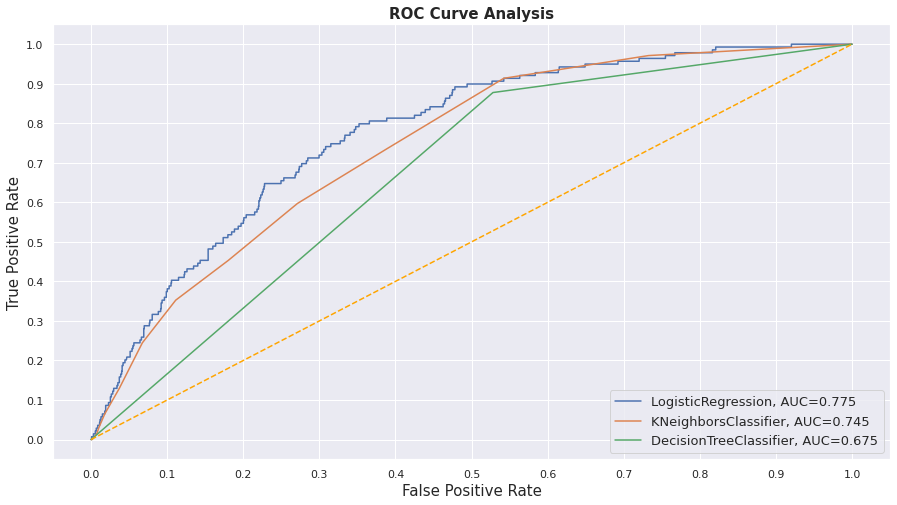

In [ ]:
# Affichage de la figure ROC :

fig = plt.figure(figsize=(15, 8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### Meilleur score selon le roc = LR. On le sélectionne. (Relancer le notebook jusqu'à Sans PCA scaler2 !)

In [ ]:
# Creation de l'array des différentes prédictions :

df_client_number = df_telecom.select_dtypes(['number'])
X_client = df_client_number
X_client_scaled = scaler2.transform(X_client)
modelLR.predict(X_client_scaled)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
# Création des labels prédits :

df_telecom['Prediction_LR'] = modelLR.predict(X_client_scaled)

In [ ]:
# Renommage des valeurs de la colonnes prédictions pour mieux correspondre à nos attentes :

df_telecom['Prediction_LR'] = df_telecom['Prediction_LR'].apply(lambda x: 0 if x == "No" else 1)

In [ ]:
# Vérifications des différentes valeurs prédites
df_telecom['Prediction_LR'].value_counts()

0    6989
1      43
Name: Prediction_LR, dtype: int64

In [ ]:
# Création du DF des valeurs de prédictions pour l'intégrer dans notre df_telecom :

df_proba = pd.DataFrame(modelLR.predict_proba(X_client_scaled),columns=["Proba Non","Proba Oui"])
df_proba

,Proba Non,Proba Oui
0,0.653540,0.346460
1,0.765003,0.234997
2,0.678290,0.321710
3,0.787327,0.212673
4,0.576560,0.423440
...,...,...
7027,0.721997,0.278003
7028,0.748019,0.251981
7029,0.696813,0.303187
7030,0.624422,0.375578


In [ ]:
# Vérification des classes (Labels des colonnes prédites) :

modelLR.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
Proba = df_proba["Proba Oui"]
Proba

0       0.346460
1       0.234997
2       0.321710
3       0.212673
4       0.423440
          ...   
7027    0.278003
7028    0.251981
7029    0.303187
7030    0.375578
7031    0.257568
Name: Proba Oui, Length: 7032, dtype: float64

In [ ]:
# Reset de l'index pour pouvoir fusionner le df_telecom avec le df_proba :

df_telecom.reset_index(drop=True,inplace=True)

In [ ]:
# Creation de la colonne Proba_LR qui permet de savoir le % de prédictions :
df_telecom["Proba_LR"] = df_proba["Proba Oui"]
df_telecom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Prediction_LR,Proba_LR
0,7590-VHVEG,0,0,1.0,0.0,1,0.0,0,1,1,2,1,1,1,1,0,1,29.85,29.85,No,0,0,1,0,0,0.346460
1,5575-GNVDE,1,0,0.0,0.0,34,1.0,1,1,2,1,2,1,1,1,1,0,56.95,1889.50,No,0,0,0,1,0,0.234997
2,3668-QPYBK,1,0,0.0,0.0,2,1.0,1,1,2,2,1,1,1,1,0,1,53.85,108.15,Yes,0,0,0,1,0,0.321710
3,7795-CFOCW,1,0,0.0,0.0,45,0.0,0,1,2,1,2,2,1,1,1,0,42.30,1840.75,No,1,0,0,0,0,0.212673
4,9237-HQITU,0,0,0.0,0.0,2,1.0,1,2,1,1,1,1,1,1,0,1,70.70,151.65,No,0,0,1,0,0,0.423440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1.0,1.0,24,1.0,2,1,2,1,2,2,2,2,1,1,84.80,1990.50,No,0,0,0,1,0,0.278003
7028,2234-XADUH,0,0,1.0,1.0,72,1.0,2,2,1,2,2,1,2,2,1,1,103.20,7362.90,No,0,1,0,0,0,0.251981
7029,4801-JZAZL,0,0,1.0,1.0,11,0.0,0,1,2,1,1,1,1,1,0,1,29.60,346.45,No,0,0,1,0,0,0.303187
7030,8361-LTMKD,1,1,1.0,0.0,4,1.0,2,2,1,1,1,1,1,1,0,1,74.40,306.60,No,0,0,0,1,0,0.375578
